<a href="https://colab.research.google.com/github/JuanDMV/CUFICO-2018-2/blob/master/PrimerParcial_Mariana_JuanDiego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer parcial Fisica Computacional I
## Mariana Jaramillo Acero
## Juan Diego Mazo Vasquez
### Instituto de Fisica
### Universidad de Antioquia- 2019

### 1. Install packages needed for root

In [2]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.1).
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
gcc is already the newest version (4:7.3.0-3ubuntu2.1).
gfortran is already the newest version (4:7.3.0-3ubuntu2.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.1).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [3]:
# Load the Drive helper and mount
from google.colab import drive
from google.colab import files


# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb    TrimmedTree.root
BasicPyROOTExample.ipynb  root_build_google_yikes.tar


In [0]:
!tar -xf /content/drive/Team\ Drives/PyROOT_in_Google/root_build_google_yikes.tar

**Cargar los datos:**

In [6]:

uploaded = files.upload()


Saving Dato_5.txt to Dato_5 (7).txt
Saving Dato_10.txt to Dato_10 (7).txt
Saving Dato_15.txt to Dato_15 (7).txt
Saving Dato_20.txt to Dato_20 (7).txt
Saving Dato_25.txt to Dato_25 (7).txt
Saving Dato_30.txt to Dato_30 (7).txt
Saving Dato_35.txt to Dato_35 (7).txt
Saving Dato_40.txt to Dato_40 (7).txt
Saving Dato_45.txt to Dato_45 (7).txt
Saving Dato_50.txt to Dato_50 (7).txt
Saving Dato_55.txt to Dato_55 (7).txt
Saving Dato_60.txt to Dato_60 (1).txt



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [8]:
import ROOT
import numpy as np
from ROOT import gROOT 
from ROOT import TCanvas, TGraph, TF1

Welcome to JupyROOT 6.14/04


Los datos son subidos como diccionarios, a los cuales hay que acceder y decodificar para obtener los datos

In [9]:
uploaded

{'Dato_10.txt': b'0.9667\n1.4289\n1.5248\n2.9613\n1.5040\n1.3418\n1.0871\n3.1236\n1.7460\n5.5796\n1.1125\n8.8421\n2.0085\n1.4314\n2.2180\n1.4999\n2.2280\n3.0049\n1.6706\n4.3115\n',
 'Dato_15.txt': b'1.9863\n2.5938\n2.0054\n7.8404\n4.2327\n3.5676\n3.6997\n4.3064\n8.2973\n4.6483\n0.9853\n1.3791\n3.3653\n4.2607\n5.8106\n3.8327\n8.1062\n2.4679\n6.6019\n2.4758\n',
 'Dato_20.txt': b'4.7356\n6.0747\n10.8550\n4.9531\n12.4153\n3.2845\n4.7729\n15.5775\n5.4305\n10.9187\n8.2497\n4.7770\n8.0419\n11.7034\n3.0355\n3.4089\n4.9127\n6.1467\n6.0946\n2.3333\n',
 'Dato_25.txt': b'18.0097\n16.4644\n33.1443\n33.3224\n18.6399\n6.0509\n8.2062\n10.9883\n17.1607\n3.6159\n18.0078\n15.8155\n16.2049\n13.8278\n11.3344\n10.4239\n22.7105\n5.8741\n15.3889\n18.4425\n',
 'Dato_30.txt': b'10.1562\n57.7751\n31.6121\n37.5205\n94.382\n12.2310\n17.2441\n14.0185\n11.8993\n22.8759\n44.1380\n15.6146\n30.0812\n8.3186\n47.6608\n29.5569\n13.8156\n29.0488\n15.2146\n29.6305\n',
 'Dato_35.txt': b'12.5807\n36.5696\n15.5720\n34.0005\n18

In [10]:
arreglos = []

def read(name):
  D = uploaded[name].decode('utf-8')
  M = D.split('\n')
  X = []
  for i in range(len(M)):
    if M[i].replace('.', '').isdigit():
      X.append(float(M[i]))
  
  return X

for i in range(5, 61, 5):
  arreglos.append(read('Dato_%d.txt' % i))
 
print(arreglos)
  

[[1.1208, 0.5144, 1.0107, 0.7967, 0.7735, 0.5155, 1.2259, 0.7705, 0.6887, 0.6858, 1.0303, 0.5399, 0.4721, 1.8879, 0.8848, 0.5298, 0.5852, 0.5159, 0.6817, 0.6436], [0.9667, 1.4289, 1.5248, 2.9613, 1.504, 1.3418, 1.0871, 3.1236, 1.746, 5.5796, 1.1125, 8.8421, 2.0085, 1.4314, 2.218, 1.4999, 2.228, 3.0049, 1.6706, 4.3115], [1.9863, 2.5938, 2.0054, 7.8404, 4.2327, 3.5676, 3.6997, 4.3064, 8.2973, 4.6483, 0.9853, 1.3791, 3.3653, 4.2607, 5.8106, 3.8327, 8.1062, 2.4679, 6.6019, 2.4758], [4.7356, 6.0747, 10.855, 4.9531, 12.4153, 3.2845, 4.7729, 15.5775, 5.4305, 10.9187, 8.2497, 4.777, 8.0419, 11.7034, 3.0355, 3.4089, 4.9127, 6.1467, 6.0946, 2.3333], [18.0097, 16.4644, 33.1443, 33.3224, 18.6399, 6.0509, 8.2062, 10.9883, 17.1607, 3.6159, 18.0078, 15.8155, 16.2049, 13.8278, 11.3344, 10.4239, 22.7105, 5.8741, 15.3889, 18.4425], [10.1562, 57.7751, 31.6121, 37.5205, 94.382, 12.231, 17.2441, 14.0185, 11.8993, 22.8759, 44.138, 15.6146, 30.0812, 8.3186, 47.6608, 29.5569, 13.8156, 29.0488, 15.2146, 29.630

## A continuación se muestran los histogramas para los datos de tiempo para cada valor del rango del mapa. Adicional se presentan las curvas de ajuste realizadas con ROOT y se muestran los valores de los parámetros de ajuste


 FCN=0.177478 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=8.90343e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.79888e+00   2.04107e+00   7.07860e-04   1.79845e-04
   2  Mean         5.00169e-01   4.43101e-01   6.23281e-05   1.68614e-03
   3  Sigma        4.03465e-01   2.67771e-01   5.07477e-05   6.47369e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


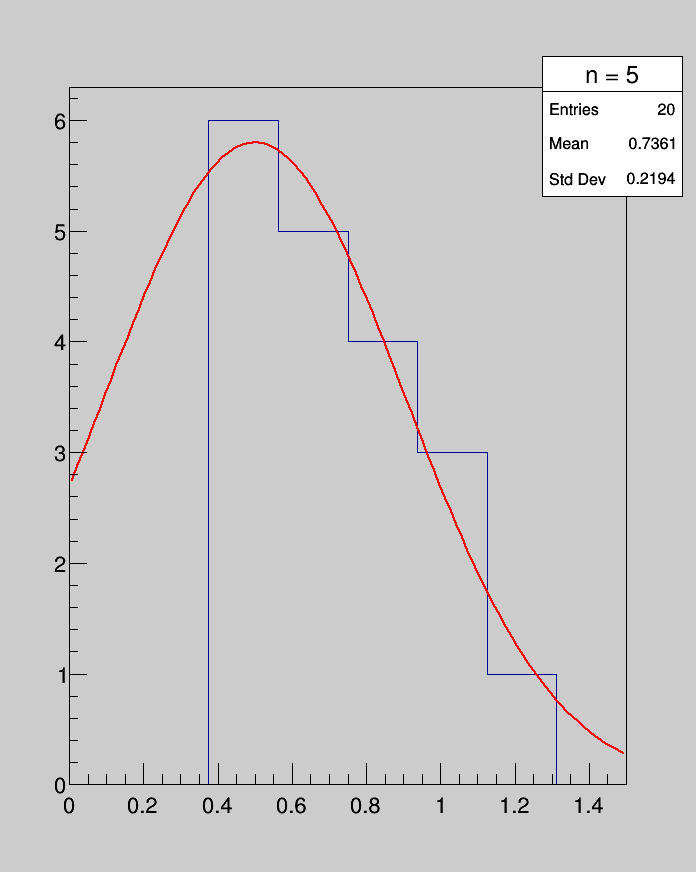

In [14]:
q = 0
Histo = ROOT.TH1F( 'n = 5' , '', 8, 0, 1.5)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 5', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 1.5);
Histo.Fit("f1","S")

 FCN=2.73621 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=3.41668e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.51243e+00   3.64981e+00   2.16184e-03  -2.88498e-04
   2  Mean         1.99004e+00   2.57618e-01   2.43299e-04  -1.83538e-03
   3  Sigma        1.01218e+00   3.36514e-01   4.60037e-05  -7.56106e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


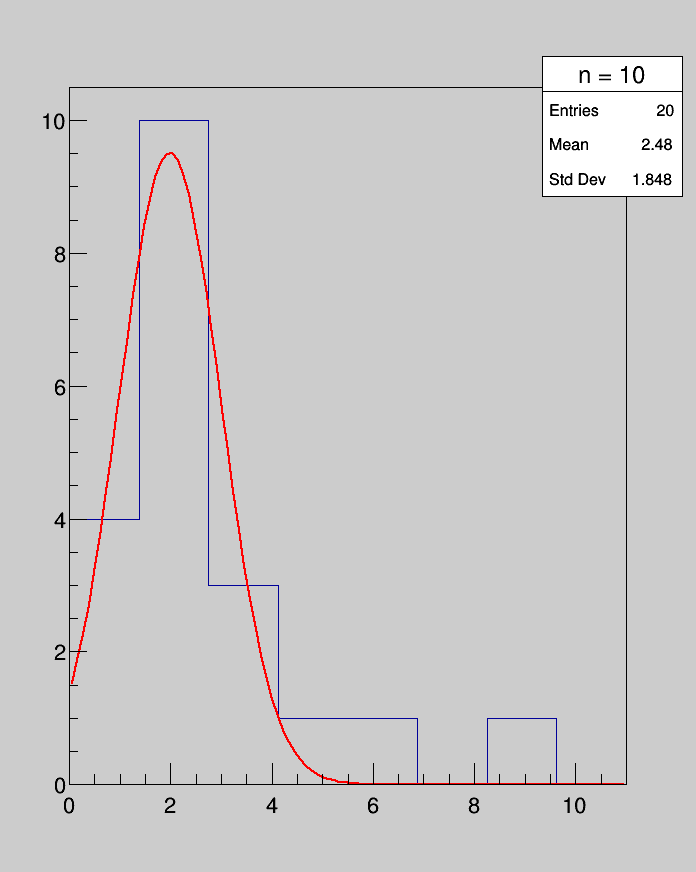

In [12]:
q = 1
Histo = ROOT.TH1F( 'n = 10' , '', 8, 0, 11.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 10', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 11.0);
Histo.Fit("f1","S")

 FCN=3.49992 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=1.00908e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.96439e+00   1.67723e+00   1.01055e-03  -3.56815e-06
   2  Mean         3.29725e+00   4.51005e-01   4.64410e-04   7.70756e-05
   3  Sigma        1.70316e+00   6.64106e-01   6.84048e-05   1.77158e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


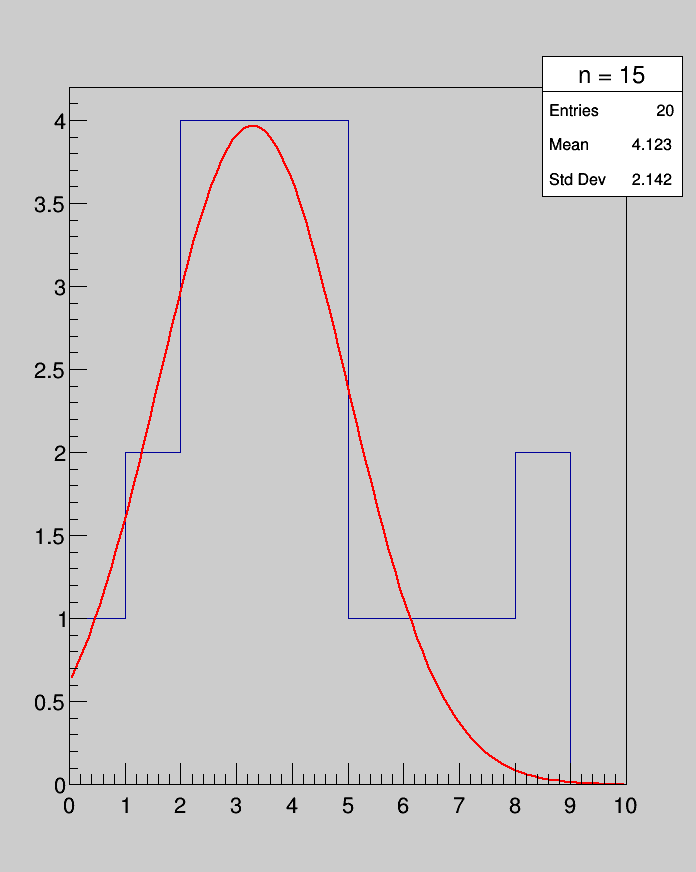

In [13]:
q = 2
Histo = ROOT.TH1F( 'n = 15' , '', 10, 0, 10.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 15', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 9.0);
Histo.Fit("f1","S")

 FCN=1.85172 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.92107e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.83108e+00   8.97201e-01   5.48475e-04  -1.71106e-04
   2  Mean         7.05920e+00   1.52624e+00   1.23435e-03   1.76930e-04
   3  Sigma        4.75499e+00   1.78964e+00   8.95113e-05  -5.22122e-03


Warning in <TROOT::Append>: Replacing existing TH1: n = 20 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


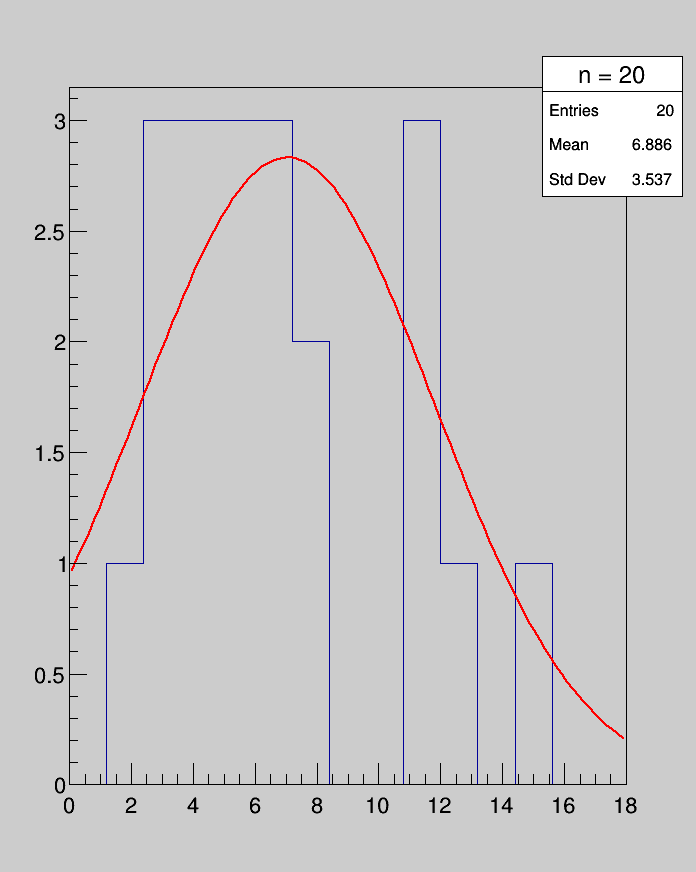

In [18]:
q = 3
Histo = ROOT.TH1F( 'n = 20' , '', 15, 0, 18.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 20', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 18.0);
Histo.Fit("f1","S")

 FCN=4.91626 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=6.82458e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.04184e+00   1.38084e+00   1.23970e-03  -3.10603e-04
   2  Mean         1.30618e+01   1.88139e+00   2.22578e-03  -4.15644e-04
   3  Sigma        6.30352e+00   1.87884e+00   7.82592e-05  -1.27694e-02


Warning in <TROOT::Append>: Replacing existing TH1: n = 25 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


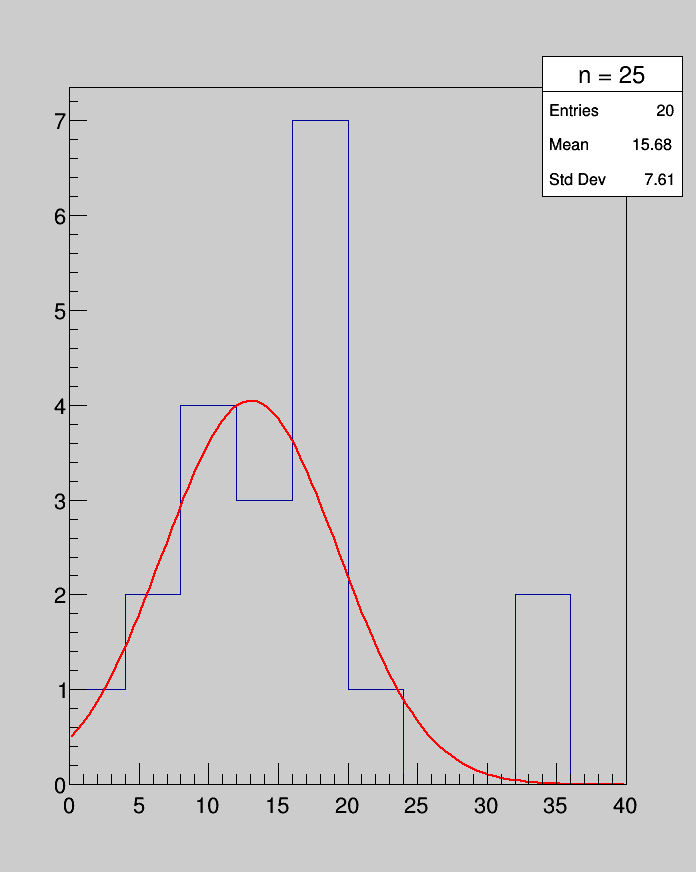

In [20]:
q = 4
Histo = ROOT.TH1F( 'n = 25' , '', 10, 0, 40.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 25', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 40.0);
Histo.Fit("f1","S")

 FCN=0.325032 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=6.94687e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.20246e+00   1.92349e+00   8.06810e-04   2.21208e-05
   2  Mean         2.32903e+01   4.37961e+00   2.35409e-03  -8.79785e-06
   3  Sigma        1.54793e+01   4.48595e+00   4.31362e-05  -8.27288e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


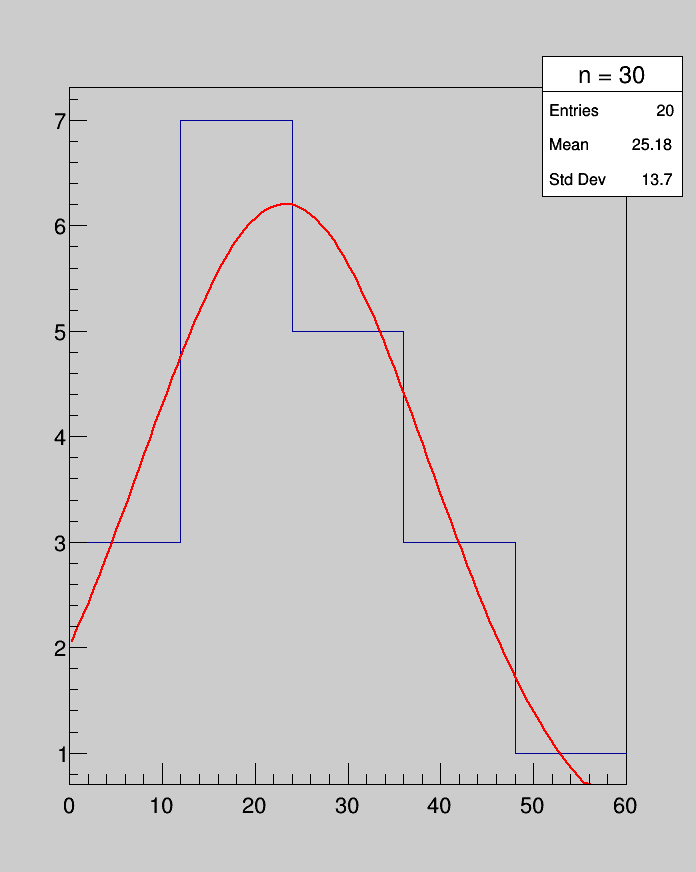

In [15]:
q = 5
Histo = ROOT.TH1F( 'n = 30' , '', 5, 0, 60.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 30', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 60.0);
Histo.Fit("f1","S")

 FCN=0.639125 FROM MIGRAD    STATUS=CONVERGED    1116 CALLS        1117 TOTAL
                     EDM=5.30901e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.72637e+02   1.23213e+03   7.95805e-02  -7.21526e-06
   2  Mean        -3.05553e+02   1.23135e+02  -1.71376e-02  -7.53236e-05
   3  Sigma        1.08345e+02   5.43909e+01   2.24816e-03  -4.73543e-04


Warning in <TROOT::Append>: Replacing existing TH1: n = 35 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


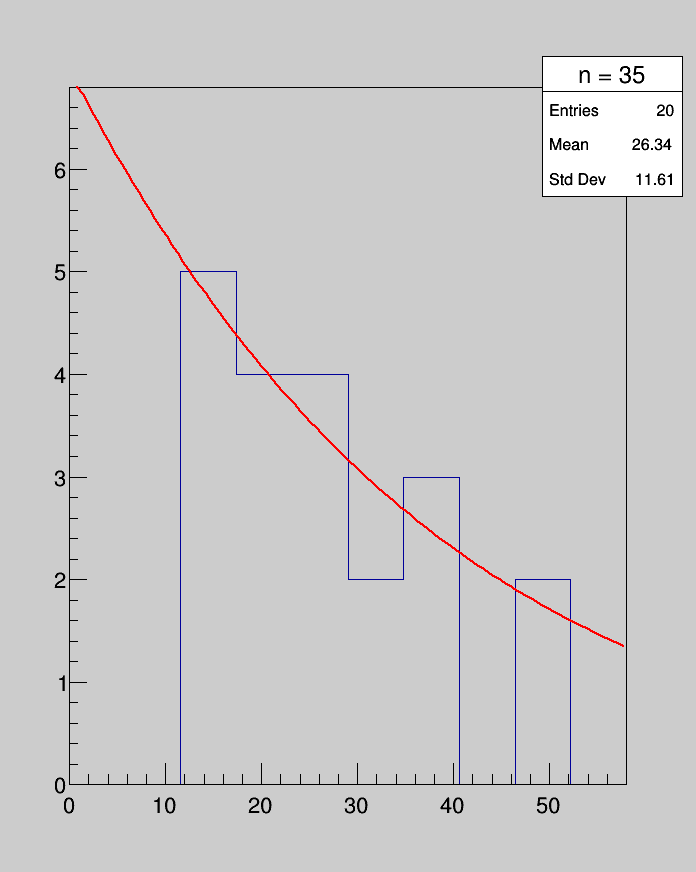

In [22]:
q = 6
Histo = ROOT.TH1F( 'n = 35' , '', 10, 0, 58.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 35', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 58.0);
Histo.Fit("f1","S")



 FCN=3.91107 FROM MIGRAD    STATUS=CONVERGED      99 CALLS         100 TOTAL
                     EDM=6.97473e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.09359e+01   3.44051e+00   2.95070e-03  -7.88776e-05
   2  Mean         3.14707e+01   2.99587e+00   3.23404e-03  -5.73784e-06
   3  Sigma        1.17300e+01   2.34744e+00   4.46568e-05   2.69170e-03


Warning in <TROOT::Append>: Replacing existing TH1: n = 40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


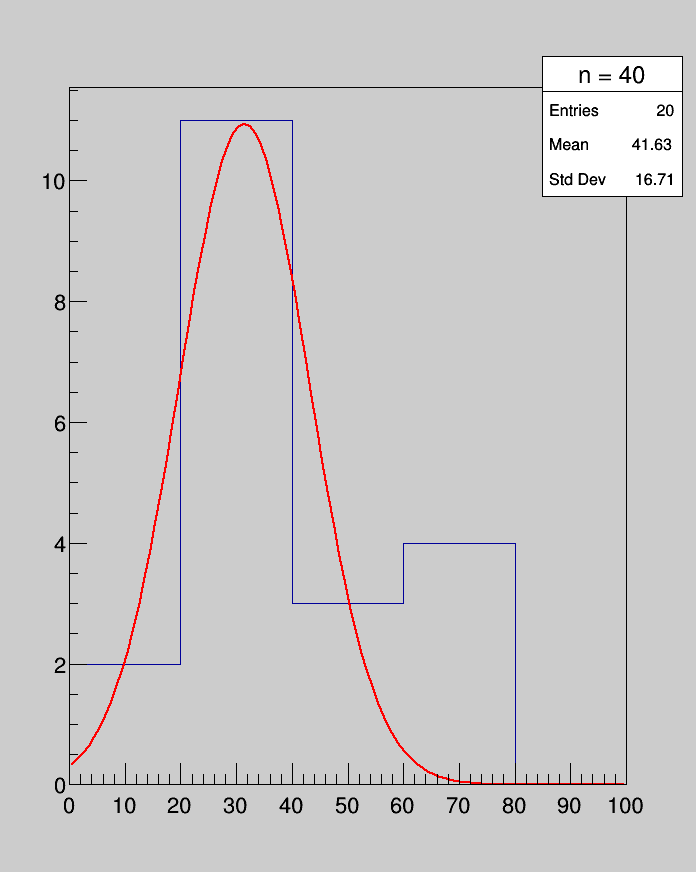

In [26]:
q = 7
Histo = ROOT.TH1F( 'n = 40' , '', 5, 0, 100.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 40', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 100.0);
Histo.Fit("f1","S")

 FCN=0.363736 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.52811e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.04322e+01   3.40532e+00   1.34258e-03  -2.35953e-05
   2  Mean         6.08129e+01   4.71735e+00   2.63566e-03   3.59283e-05
   3  Sigma        1.97133e+01   4.98285e+00   3.32725e-05  -5.08357e-04


Warning in <TROOT::Append>: Replacing existing TH1: n = 45 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


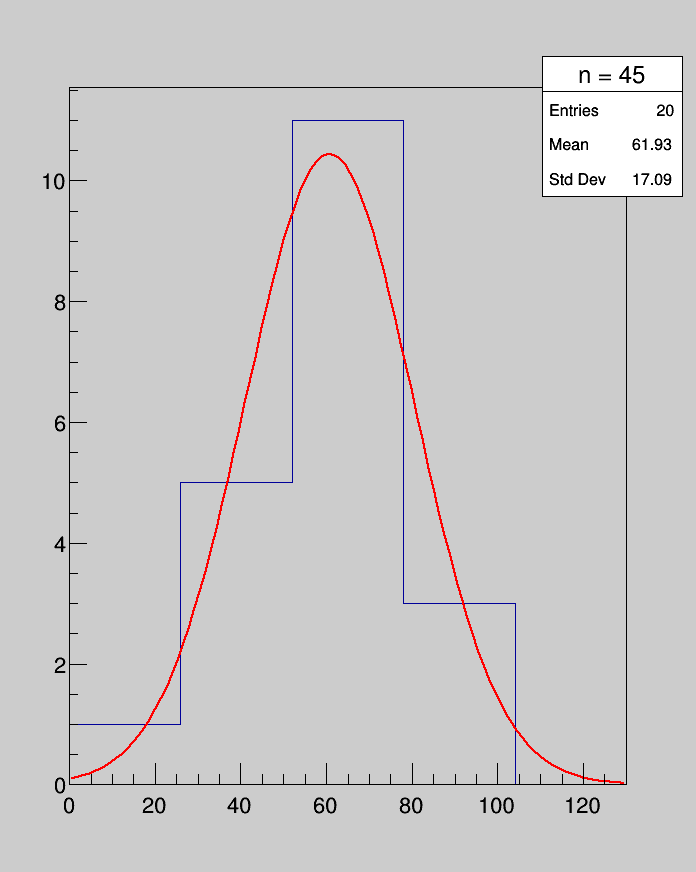

In [28]:

q = 8
Histo = ROOT.TH1F( 'n = 45' , '', 5, 0, 130.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 45', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0,130.0);
Histo.Fit("f1","S")

 FCN=1.52667 FROM MIGRAD    STATUS=CONVERGED     119 CALLS         120 TOTAL
                     EDM=8.38368e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.83329e+00   9.53911e-01   5.11341e-04   5.66663e-05
   2  Mean         5.90662e+01   5.17741e+01   3.20535e-02  -1.15921e-06
   3  Sigma        6.51773e+01   1.48083e+02   5.81333e-04  -8.36938e-05


Warning in <TROOT::Append>: Replacing existing TH1: n = 50 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


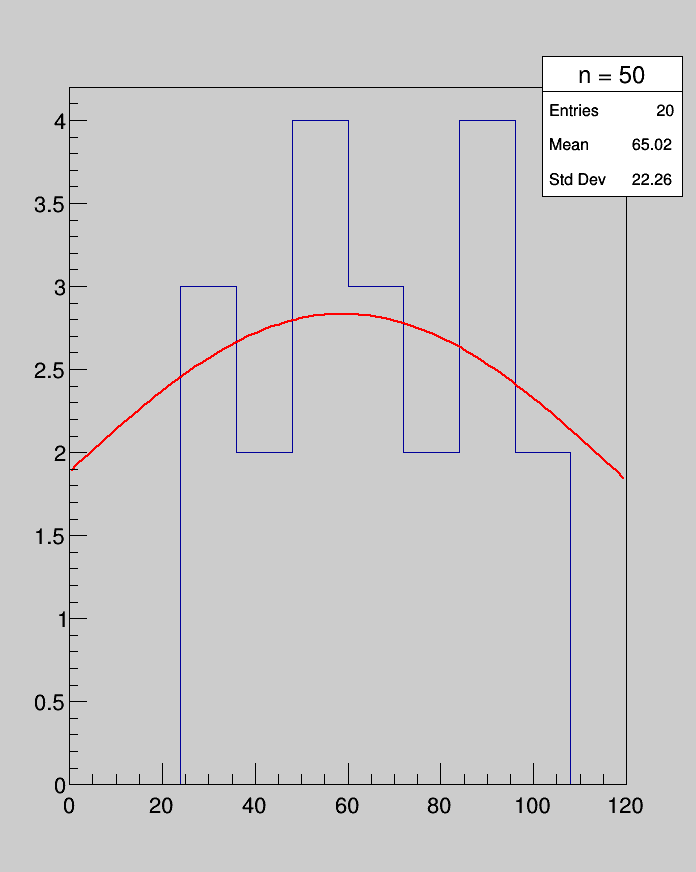

In [30]:
q = 9
Histo = ROOT.TH1F( 'n = 50' , '', 10, 0, 120.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 50', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 120.0);
Histo.Fit("f1","S")

 FCN=0.0332445 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=2.88941e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.84327e+00   2.78816e+00   1.09951e-03  -2.59303e-04
   2  Mean         7.23028e+01   5.12228e+00   2.47776e-03   2.78543e-06
   3  Sigma        2.12999e+01   4.09384e+00   2.53330e-05  -1.42874e-02


Warning in <TROOT::Append>: Replacing existing TH1: n = 55 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


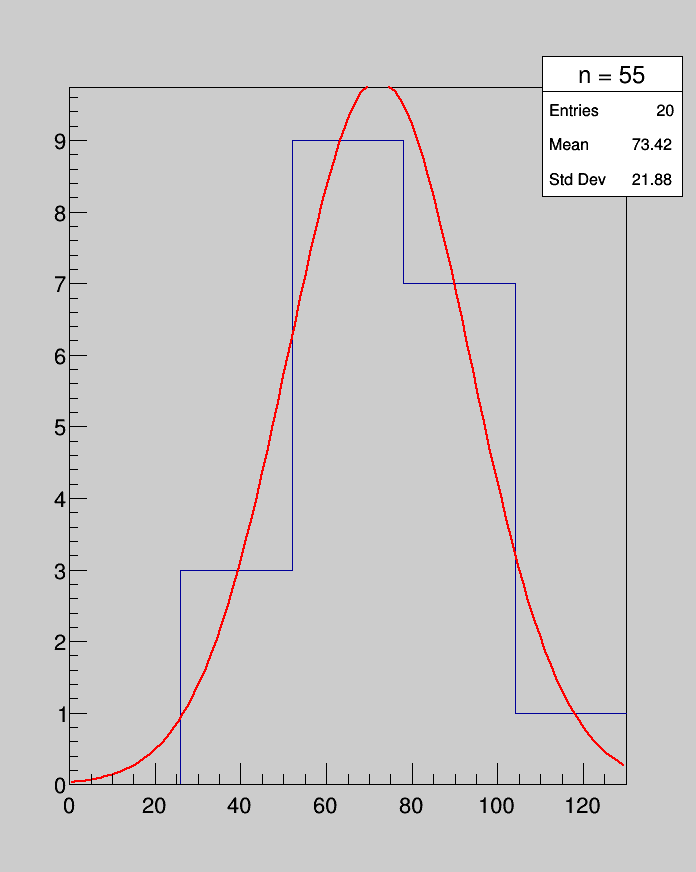

In [34]:
q = 10
Histo = ROOT.TH1F( 'n = 55' , '', 5, 0, 130.0)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 55', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 130.0);
Histo.Fit("f1","S")


 FCN=0.776686 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=2.54889e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.86947e+00   3.54720e+00   1.46562e-03  -1.87581e-05
   2  Mean         9.37022e+01   1.76356e+01   6.98153e-03   4.02174e-06
   3  Sigma        3.97868e+01   1.90417e+01   4.92566e-05  -6.68931e-05


Warning in <TROOT::Append>: Replacing existing TH1: n = 60 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


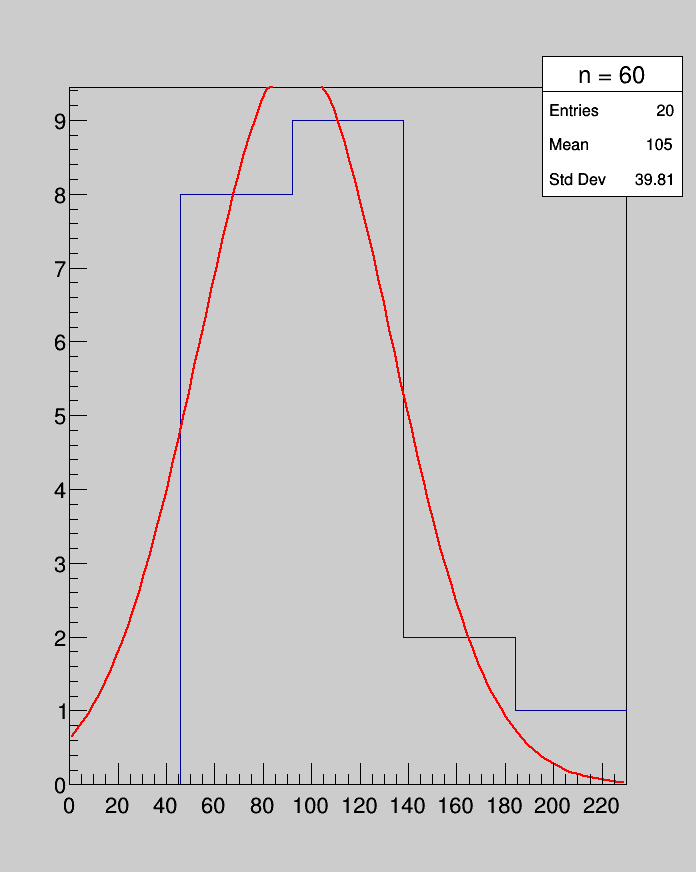

In [22]:
q = 11
Histo = ROOT.TH1F( 'n = 60' , '', 5, 0, 230)
for i in arreglos[q]:
    Histo.Fill(i)
c0 = ROOT.TCanvas( 'c0', 'Histograma n = 60', 200, 10, 700, 900 )
c0.SetFillColor( 17)
Histo.Draw()
c0.Update()
gROOT.GetListOfCanvases().Draw()

f1 = ROOT.TF1("f1", "gaus", 0, 230);
Histo.Fit("f1","S")

In [0]:
N = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,60]
Med = []
Max = []

for i in range(len(arreglos)):
  Med.append( np.mean(arreglos[i]))
  Max.append(max(arreglos[i])) 
  

## A continuación se muestran los valores centrales para cada uno de los valores del rango del mapa

In [36]:
for i in range(len(arreglos)):
  
  print('El valor central para n = %d es %.3f'%(N[i], np.median(arreglos[i])))

El valor central para n = 5 es 0.687
El valor central para n = 10 es 1.708
El valor central para n = 15 es 3.766
El valor central para n = 20 es 5.753
El valor central para n = 25 es 16.010
El valor central para n = 30 es 25.962
El valor central para n = 35 es 24.015
El valor central para n = 40 es 36.287
El valor central para n = 45 es 65.787
El valor central para n = 50 es 69.154
El valor central para n = 55 es 65.266
El valor central para n = 60 es 97.686


## Finalmente se muestran los gráficos de valores máximos y de valores medios como función del rango del mapa. Adicional se presentan las curvas de ajuste realizadas con ROOT


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      6577.04
NDf                       =            9
Edm                       =  2.79841e-18
NCalls                    =           63
p0                        =      6.96788   +/-   27.9394     
p1                        =    -0.328378   +/-   1.9763      
p2                        =    0.0529334   +/-   0.0295984   


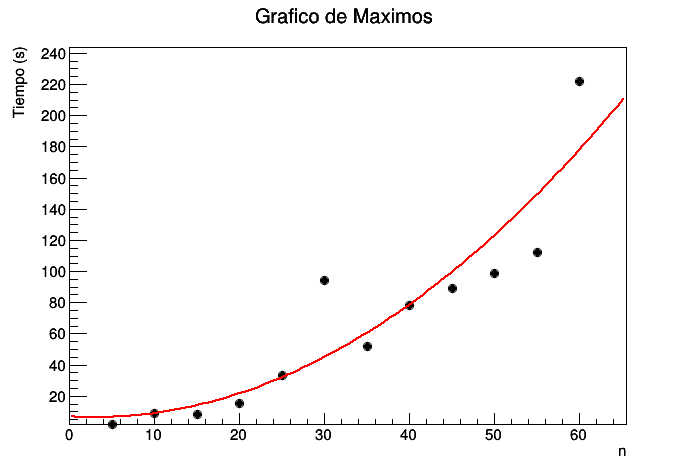

In [37]:
c = TCanvas('Grafico de Maximos')
g = TGraph(11)
g.SetTitle( 'Grafico de Maximos' )

for i in range(len(N)):
  g.SetPoint(i, N[i], Max[i])

func = TF1('func', '[0]+ [1]*x + [2]*x**2 ', 0, 60)
fit = g.Fit('func', 'S')

c.Draw()
g.SetMarkerStyle(9)
g.SetMarkerSize(1)
a = g.GetXaxis() 
a.SetTitle("n")
b = g.GetYaxis() 
b.SetTitle("Tiempo (s)")
g.Draw("AP")

Para los datos de máximos, se pensó en un ajuste con un polinomio cuadrático de la forma a*x^2 + b*x + c, se obtuvo que:
a = 0.05, b = -0.3, c = 6.96


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      256.951
NDf                       =            9
Edm                       =  3.84623e-19
NCalls                    =           65
p0                        =     0.710037   +/-   5.52238     
p1                        =      -0.1743   +/-   0.390628    
p2                        =    0.0302375   +/-   0.00585029  


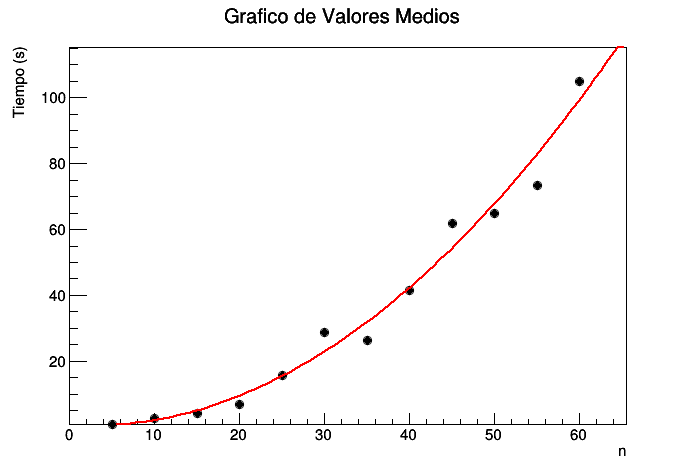

In [27]:
c = TCanvas('Grafico de Valores medios')
g = TGraph(11)
g.SetTitle( 'Grafico de Valores Medios' )

for i in range(len(N)):
  g.SetPoint(i, N[i], Med[i])

func = TF1('func', '[0]+ [1]*x + [2]*x**2', 0, 60)
fit = g.Fit('func', 'S')

c.Draw()
g.SetMarkerStyle(9)
g.SetMarkerSize(1)
a = g.GetXaxis() 
a.SetTitle("n")
b = g.GetYaxis() 
b.SetTitle("Tiempo (s)")
g.Draw("AP")

Para los datos de máximos, se pensó en un ajuste con un polinomio cuadrático de la forma a*x^2 + b*x + c, se obtuvo que:
a = 0.03 , b = -0.17 , c = 0.71